In [24]:
import numpy as np
import torch
import matplotlib
from matplotlib import pyplot as plt
device = "cpu"

In [7]:
Rs = [0.0, 0.25, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 1.0]
Ns = [50, 100, 200, 300]

In [109]:
np.round(0.51)

1.0

In [40]:
# Define nonlinear activation function
def f(x): # nonlinear conversion function to binary
    return x.sigmoid()#tanh().add(1).div(2)

In [105]:
N_ind = 0
errs_all_R = []

N = Ns[N_ind]
for R in Rs[1:]:

    x = torch.tensor(np.genfromtxt("x_{}.csv".format(N), delimiter=','), device=device).float()
    y = torch.tensor(np.genfromtxt("y_{}.csv".format(N), delimiter=','), device=device).float()

    w1 = torch.tensor(np.loadtxt("Data/weights1_{}_{}.dat".format(N, R)), dtype=torch.float32, device=device)
    w2 = torch.tensor(np.loadtxt("Data/weights2_{}_{}.dat".format(N, R)), dtype=torch.float32, device=device)
    b1 = torch.tensor(np.loadtxt("Data/bias1_{}_{}.dat".format(N, R)), dtype=torch.float32, device=device)
    b2 = torch.tensor(np.loadtxt("Data/bias2_{}_{}.dat".format(N, R)), dtype=torch.float32, device=device)

    y_pred = f(f(x.mm(w1).add(b1)).mm(w2).add(b2))
    y_pred = y_pred.detach().numpy()
    y_org = y.detach().numpy()

    errs_all = []
    offsets = [-0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4]
    thresholds = 0.5 + np.array(offsets)
    for offset in offsets:
        binary_y = np.round(y_pred-offset)
        err = np.sum(np.abs(binary_y - y_org))/N**2
        errs_all.append(err)
    errs_all_R.append(errs_all)

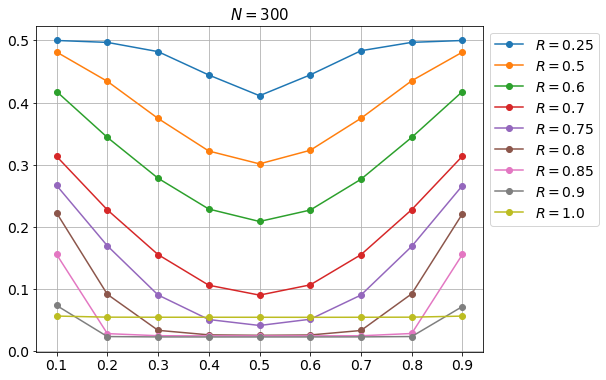

In [100]:
plt.figure(figsize=(8, 6))
for R_ind, R in enumerate(Rs[1:]):
    plt.plot(thresholds, errs_all_R[R_ind], 'o-', label = '$R = {}$'.format(R))
plt.title(r'$N = {}$'.format(N), fontsize=15)
plt.tick_params(labelsize=14)
plt.grid()
plt.legend(fontsize=14, bbox_to_anchor=(1, 1))
plt.show()

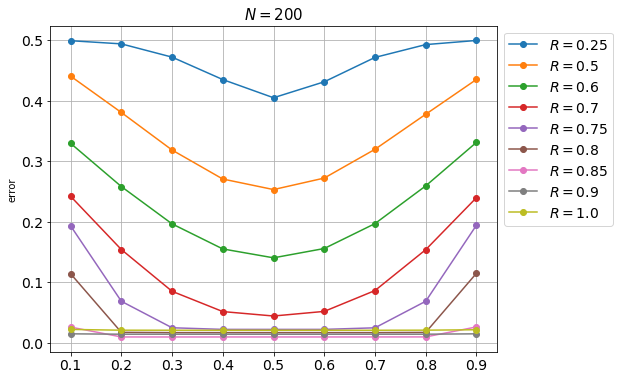

In [102]:
plt.figure(figsize=(8, 6))
for R_ind, R in enumerate(Rs[1:]):
    plt.plot(thresholds, errs_all_R[R_ind], 'o-', label = '$R = {}$'.format(R))
plt.title(r'$N = {}$'.format(N), fontsize=15)
plt.ylabel('error')
plt.tick_params(labelsize=14)
plt.grid()
plt.legend(fontsize=14, bbox_to_anchor=(1, 1))
plt.show()

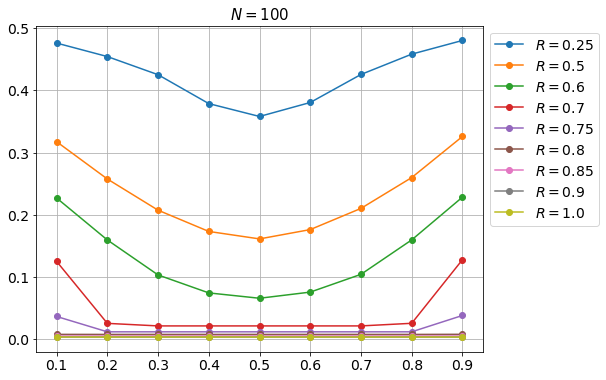

In [104]:
plt.figure(figsize=(8, 6))
for R_ind, R in enumerate(Rs[1:]):
    plt.plot(thresholds, errs_all_R[R_ind], 'o-', label = '$R = {}$'.format(R))
plt.title(r'$N = {}$'.format(N), fontsize=15)
plt.tick_params(labelsize=14)
plt.grid()
plt.legend(fontsize=14, bbox_to_anchor=(1, 1))
plt.show()

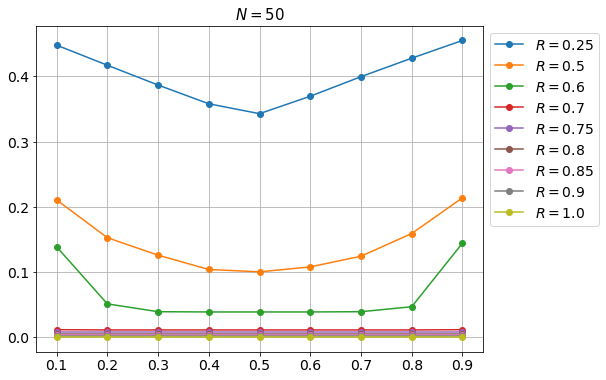

In [106]:
plt.figure(figsize=(8, 6))
for R_ind, R in enumerate(Rs[1:]):
    plt.plot(thresholds, errs_all_R[R_ind], 'o-', label = '$R = {}$'.format(R))
plt.title(r'$N = {}$'.format(N), fontsize=15)
plt.tick_params(labelsize=14)
plt.grid()
plt.legend(fontsize=14, bbox_to_anchor=(1, 1))
plt.show()

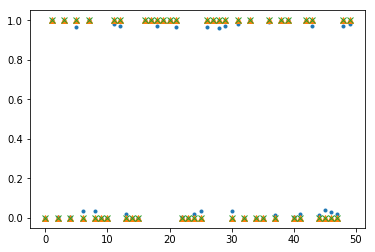

In [48]:
plt.figure()
plt.plot(y_pred[0], '.')
plt.plot(y_org[0], '^')
plt.plot(binary_y[0], 'x')
plt.show()